# Konwolucyjne sieci neuronowe

## Klasyfikacja MNIST

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Wyświetl aktualną architekturę sieci neuronowej (jedno polecenie):

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Wyświetl aktualną architekturę sieci neuronowej:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Spróbujmy wytrenować sieć konwolucyjną na zbiorze MNIST:

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.1847 - accuracy: 0.9424
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0485 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 47s 51ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0199 - accuracy: 0.9938


Sprawdź działanie modelu na testowym zbiorze danych. Jaką dokładność uzyskano?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

# uzyskano dokładność 99%

313/313 [==============================] - 4s 10ms/step - loss: 0.0351 - accuracy: 0.9900
test loss: 0.03507004678249359
test accuracy: 0.9900000095367432


## Zbiór danych psów i kotów

Utworzymy nowy zbiór składający się z trzech podzbiorów:
*   zbioru treningowego zawierającego po 1 000 próbek każdej z klas
*   zbioru walidacyjnego zawierającego po 500 próbek każdej z klas
*   zbioru testowego zawierającego po 500 próbek każdej z klas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

# Ścieżka katalogu, do którego rozpakowano oryginalny zbiór danych.
original_dataset_dir = '/content/drive/MyDrive/train'

# Katalog, w którym umieszczone zostaną mniejsze zbiory danych.
base_dir = '/content/drive/MyDrive/splits'
os.mkdir(base_dir)

# Katalogi podzbiorów (zbioru treningowego, walidacyjnego i testowego).
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Katalog z treningowym zbiorem zdjęć kotów.
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Katalog z treningowym zbiorem zdjęć psów.
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Katalog z walidacyjnym zbiorem zdjęć kotów.
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Katalog z walidacyjnym zbiorem zdjęć psów.
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Katalog z testowym zbiorem zdjęć kotów.
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Katalog z testowym zbiorem zdjęć psów.
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Kopiuje 1 000 pierwszych zdjęć kotów do folderu train_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# Kopiuje 500 kolejnych obrazów kotów do folderu validation_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# Kopiuje 500 kolejnych obrazów kotów do folderu test_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# Kopiuje 1000 pierwszych zdjęć psów do folderu train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# Kopiuje 500 kolejnych obrazów psów do folderu validation_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# Kopiuje 500 kolejnych obrazów kotów do folderu test_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('Zbiór zdjęć kotów (train, validation, test):')
print(len(os.listdir(train_cats_dir)), len(os.listdir(validation_cats_dir)), len(os.listdir(test_cats_dir)))

print('Zbiór zdjęć psów (train, validation, test):')
print(len(os.listdir(train_dogs_dir)), len(os.listdir(validation_dogs_dir)), len(os.listdir(test_dogs_dir)))

Zbiór zdjęć kotów (train, validation, test):
1000 500 500
Zbiór zdjęć psów (train, validation, test):
1000 500 500


### Budowa sieci neuronowej

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### Etap kompilacji modelu

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Wstępna obróbka cech

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Przeskalowuje wszystkie obrazy o współczynnik 1/255.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # Katalog docelowy.
    train_dir,
    # Zmienia rozdzielczość wszystkich obrazów na 150x150.
    target_size=(150, 150),
    batch_size=20,
    # Używamy funkcji binary_crossentropy w charakterze funkcji straty, a więc potrzebujemy binarnych etykiet.
    class_mode='binary')

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('kształt danych wsadowych:', data_batch.shape)
    print('kształt etykiet danych wsadowych:', labels_batch.shape)
    break

kształt danych wsadowych: (20, 150, 150, 3)
kształt etykiet danych wsadowych: (20,)


In [ ]:
history_1st = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

<ipython-input-6-8219f9dd64ef>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1st = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 534s 5s/step - loss: 0.6919 - accuracy: 0.5205 - val_loss: 0.6837 - val_accuracy: 0.6120
Epoch 2/30
100/100 [==============================] - 125s 1s/step - loss: 0.6761 - accuracy: 0.5825 - val_loss: 0.6771 - val_accuracy: 0.5480
Epoch 3/30
100/100 [==============================] - 128s 1s/step - loss: 0.6559 - accuracy: 0.6220 - val_loss: 0.6657 - val_accuracy: 0.5760
Epoch 4/30
100/100 [==============================] - 126s 1s/step - loss: 0.6282 - accuracy: 0.6495 - val_loss: 0.6395 - val_accuracy: 0.6150
Epoch 5/30
100/100 [==============================] - 129s 1s/step - loss: 0.5866 - accuracy: 0.6935 - val_loss: 0.6697 - val_accuracy: 0.6070
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 0.5584 - accuracy: 0.6930 - val_loss: 0.6612 - val_accuracy: 0.6070
Epoch 7/30
100/100 [==============================] - 126s 1s/step - loss: 0.5355 - accuracy: 0.7300 - val_loss: 0.5829 - val_accuracy: 0.6880

Utwórz wykresy straty i dokładności pracy modelu podczas przetwarzania danych treningowych i walidacyjnych:

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history_dict):
  training_loss = history_dict['loss']
  validation_loss = history_dict['val_loss']

  training_accuracy = history_dict['accuracy']
  validation_accuracy = history_dict['val_accuracy']

  plt.figure(figsize = (12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss)
  plt.plot(validation_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy)
  plt.plot(validation_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.tight_layout()
  plt.show()

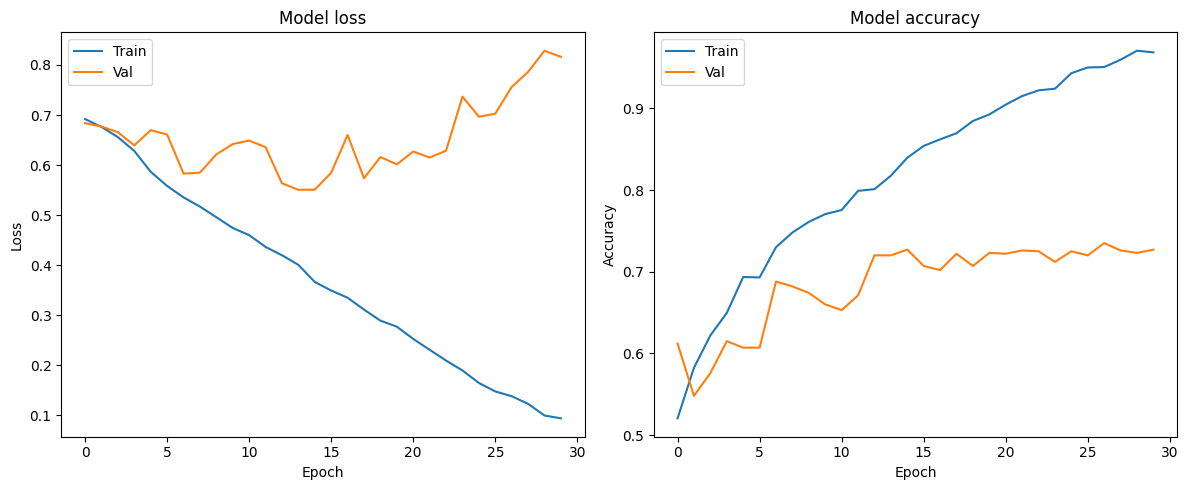

In [ ]:
history_1st_dict = history_1st.history

plot_history(history_1st_dict)

### Augmentacja danych

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

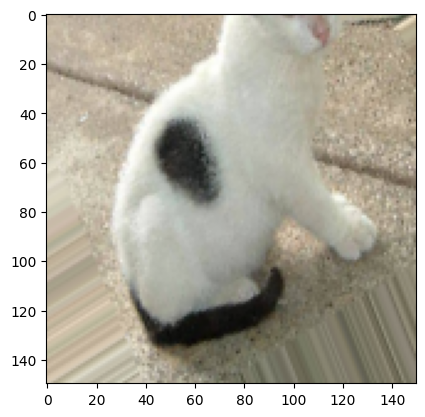

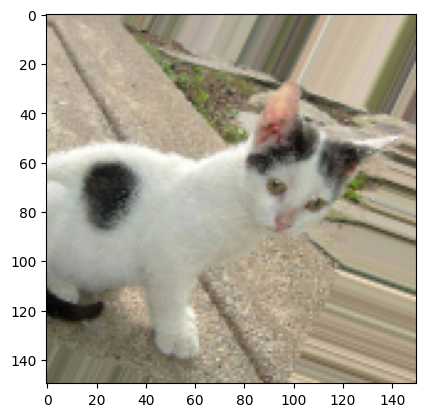

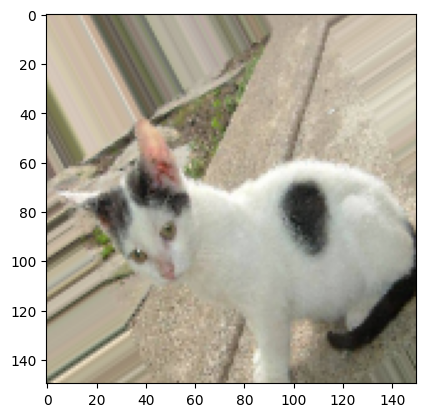

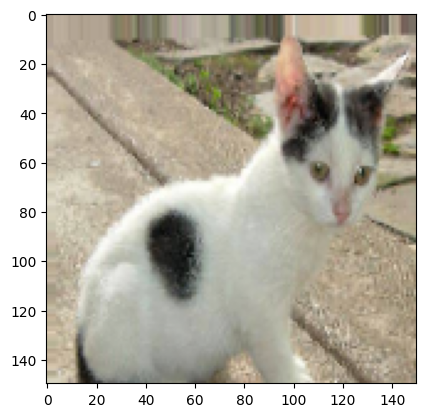

In [ ]:
# Operacja importowania modułu zawierającego narzędzia przetwarzajace obrazy.
from matplotlib import pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Wybieramy obraz do zmodyfikowania.
img_path = fnames[3]

# Wczytujemy obraz i zmieniamy jego rozdzielczość.
img = image.load_img(img_path, target_size=(150, 150))

# Zamieniamy obraz w tablicę Numpy o kształcie (150, 150, 3).
x = image.img_to_array(img)

# Zmieniamy kształt na (1, 150, 150, 3).
x = x.reshape((1,) + x.shape)

# Polecenie .flow() generuje wsady obrazów zmodyfikowanych w sposób losowy.
# Pętla jest wykonywana w nieskończoność, a więc należy ją w pewnym momencie przerwać!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Pamiętaj o tym, że nie powinno się modyfikować danych walidacyjnych!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # Katalog docelowy.
    train_dir,
    # Zmienia rozdzielczość wszystkich obrazów na 150x150.
    target_size=(150, 150),
    batch_size=20,
    # Używamy funkcji binary_crossentropy w charakterze funkcji straty, a więc potrzebujemy binarnych etykiet.
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-21-b49bbc4eaca5>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 24s 232ms/step - loss: 0.6819 - accuracy: 0.5535 - val_loss: 0.6629 - val_accuracy: 0.5990
Epoch 2/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6712 - accuracy: 0.5900 - val_loss: 0.6495 - val_accuracy: 0.6280
Epoch 3/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6649 - accuracy: 0.6040 - val_loss: 0.6424 - val_accuracy: 0.6160
Epoch 4/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6565 - accuracy: 0.6060 - val_loss: 0.6618 - val_accuracy: 0.5700
Epoch 5/100
100/100 [==============================] - 24s 238ms/step - loss: 0.6417 - accuracy: 0.6255 - val_loss: 0.6330 - val_accuracy: 0.6190
Epoch 6/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6302 - accuracy: 0.6485 - val_loss: 0.5934 - val_accuracy: 0.6720
Epoch 7/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6089 - accuracy: 0.6500 - val_loss: 0.7190 -

Dla wszystkich epok, dane z augmentacją:

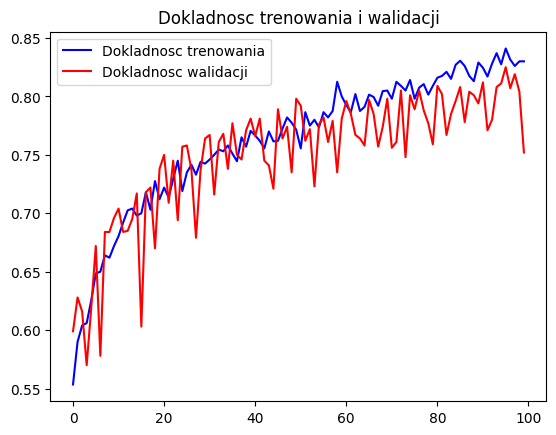

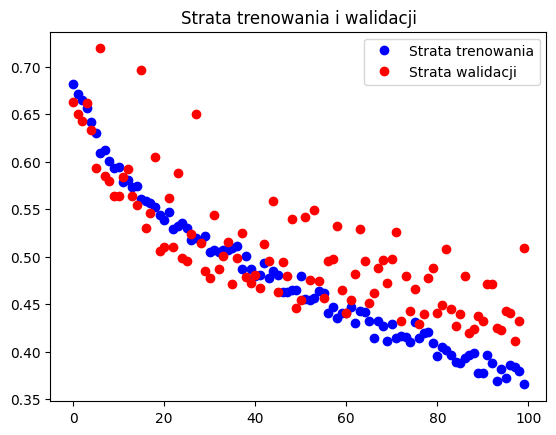

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'ro', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

Dla 30 (pierwszych) epok, dane z augmentacją:

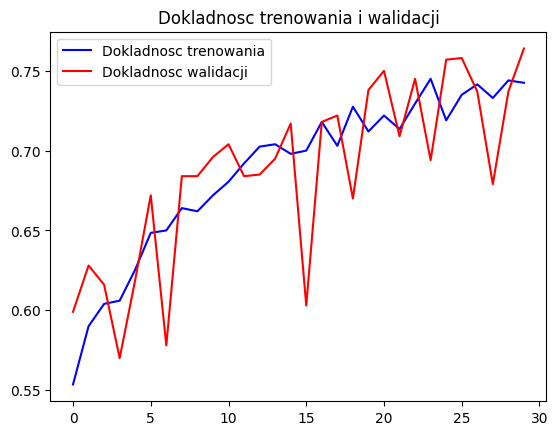

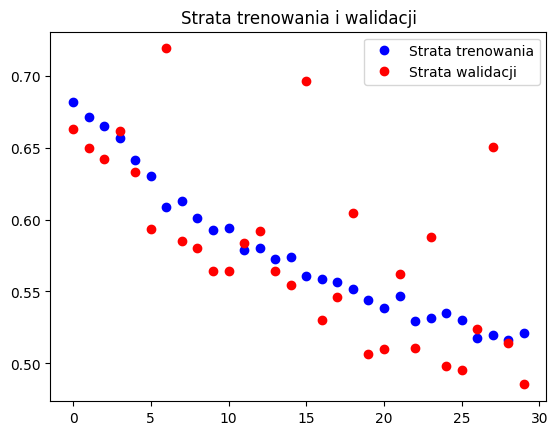

In [ ]:
history_dict = history.history

acc = history_dict['accuracy'][:30]
val_acc = history_dict['val_accuracy'][:30]
loss = history_dict['loss'][:30]
val_loss = history_dict['val_loss'][:30]
epochs = range(30)

plt.plot(epochs, acc, 'b', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'ro', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

Dla wszystkich (30) epok, dane bez augmentacji:

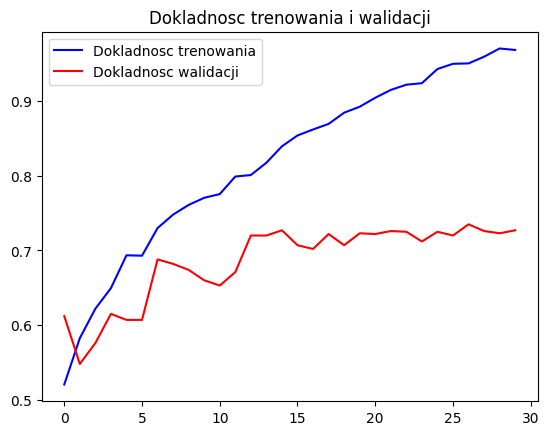

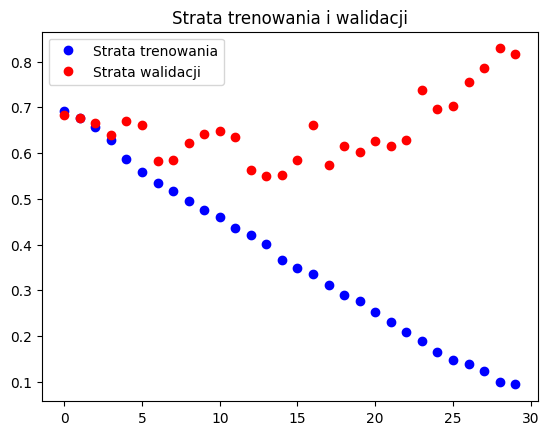

In [ ]:
history_1st_dict = history_1st.history

acc = history_1st_dict['accuracy']
val_acc = history_1st_dict['val_accuracy']
loss = history_1st_dict['loss']
val_loss = history_1st_dict['val_loss']

plt.plot(acc, 'b', label='Dokladnosc trenowania')
plt.plot(val_acc, 'r', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(loss, 'bo', label='Strata trenowania')
plt.plot(val_loss, 'ro', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()